In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [7]:
df.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     4424.000000   
mean   ...                                        0.137658   
std    ...                                        0.690880   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000        

In [8]:
df.shape

(4424, 35)

In [9]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [10]:
df.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

<AxesSubplot:>

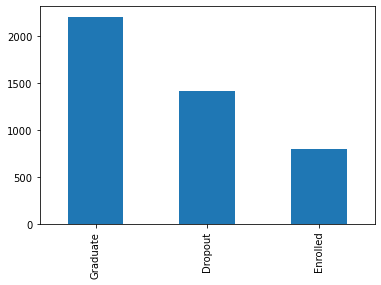

In [11]:
df.Target.value_counts().plot(kind = 'bar')

In [12]:
df.Target = df.Target.map({'Dropout':0, 'Enrolled': 1, 'Graduate': 2})

In [13]:
df.Target.unique()

array([0, 2, 1], dtype=int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [15]:
df.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

In [16]:
corr_df = df.corr()['Target']

In [17]:
corr_df.head()

Marital status               -0.089804
Application mode             -0.212025
Application order             0.089791
Course                        0.007841
Daytime/evening attendance    0.075107
Name: Target, dtype: float64

In [18]:
corr_df.to_csv('correlation.csv')

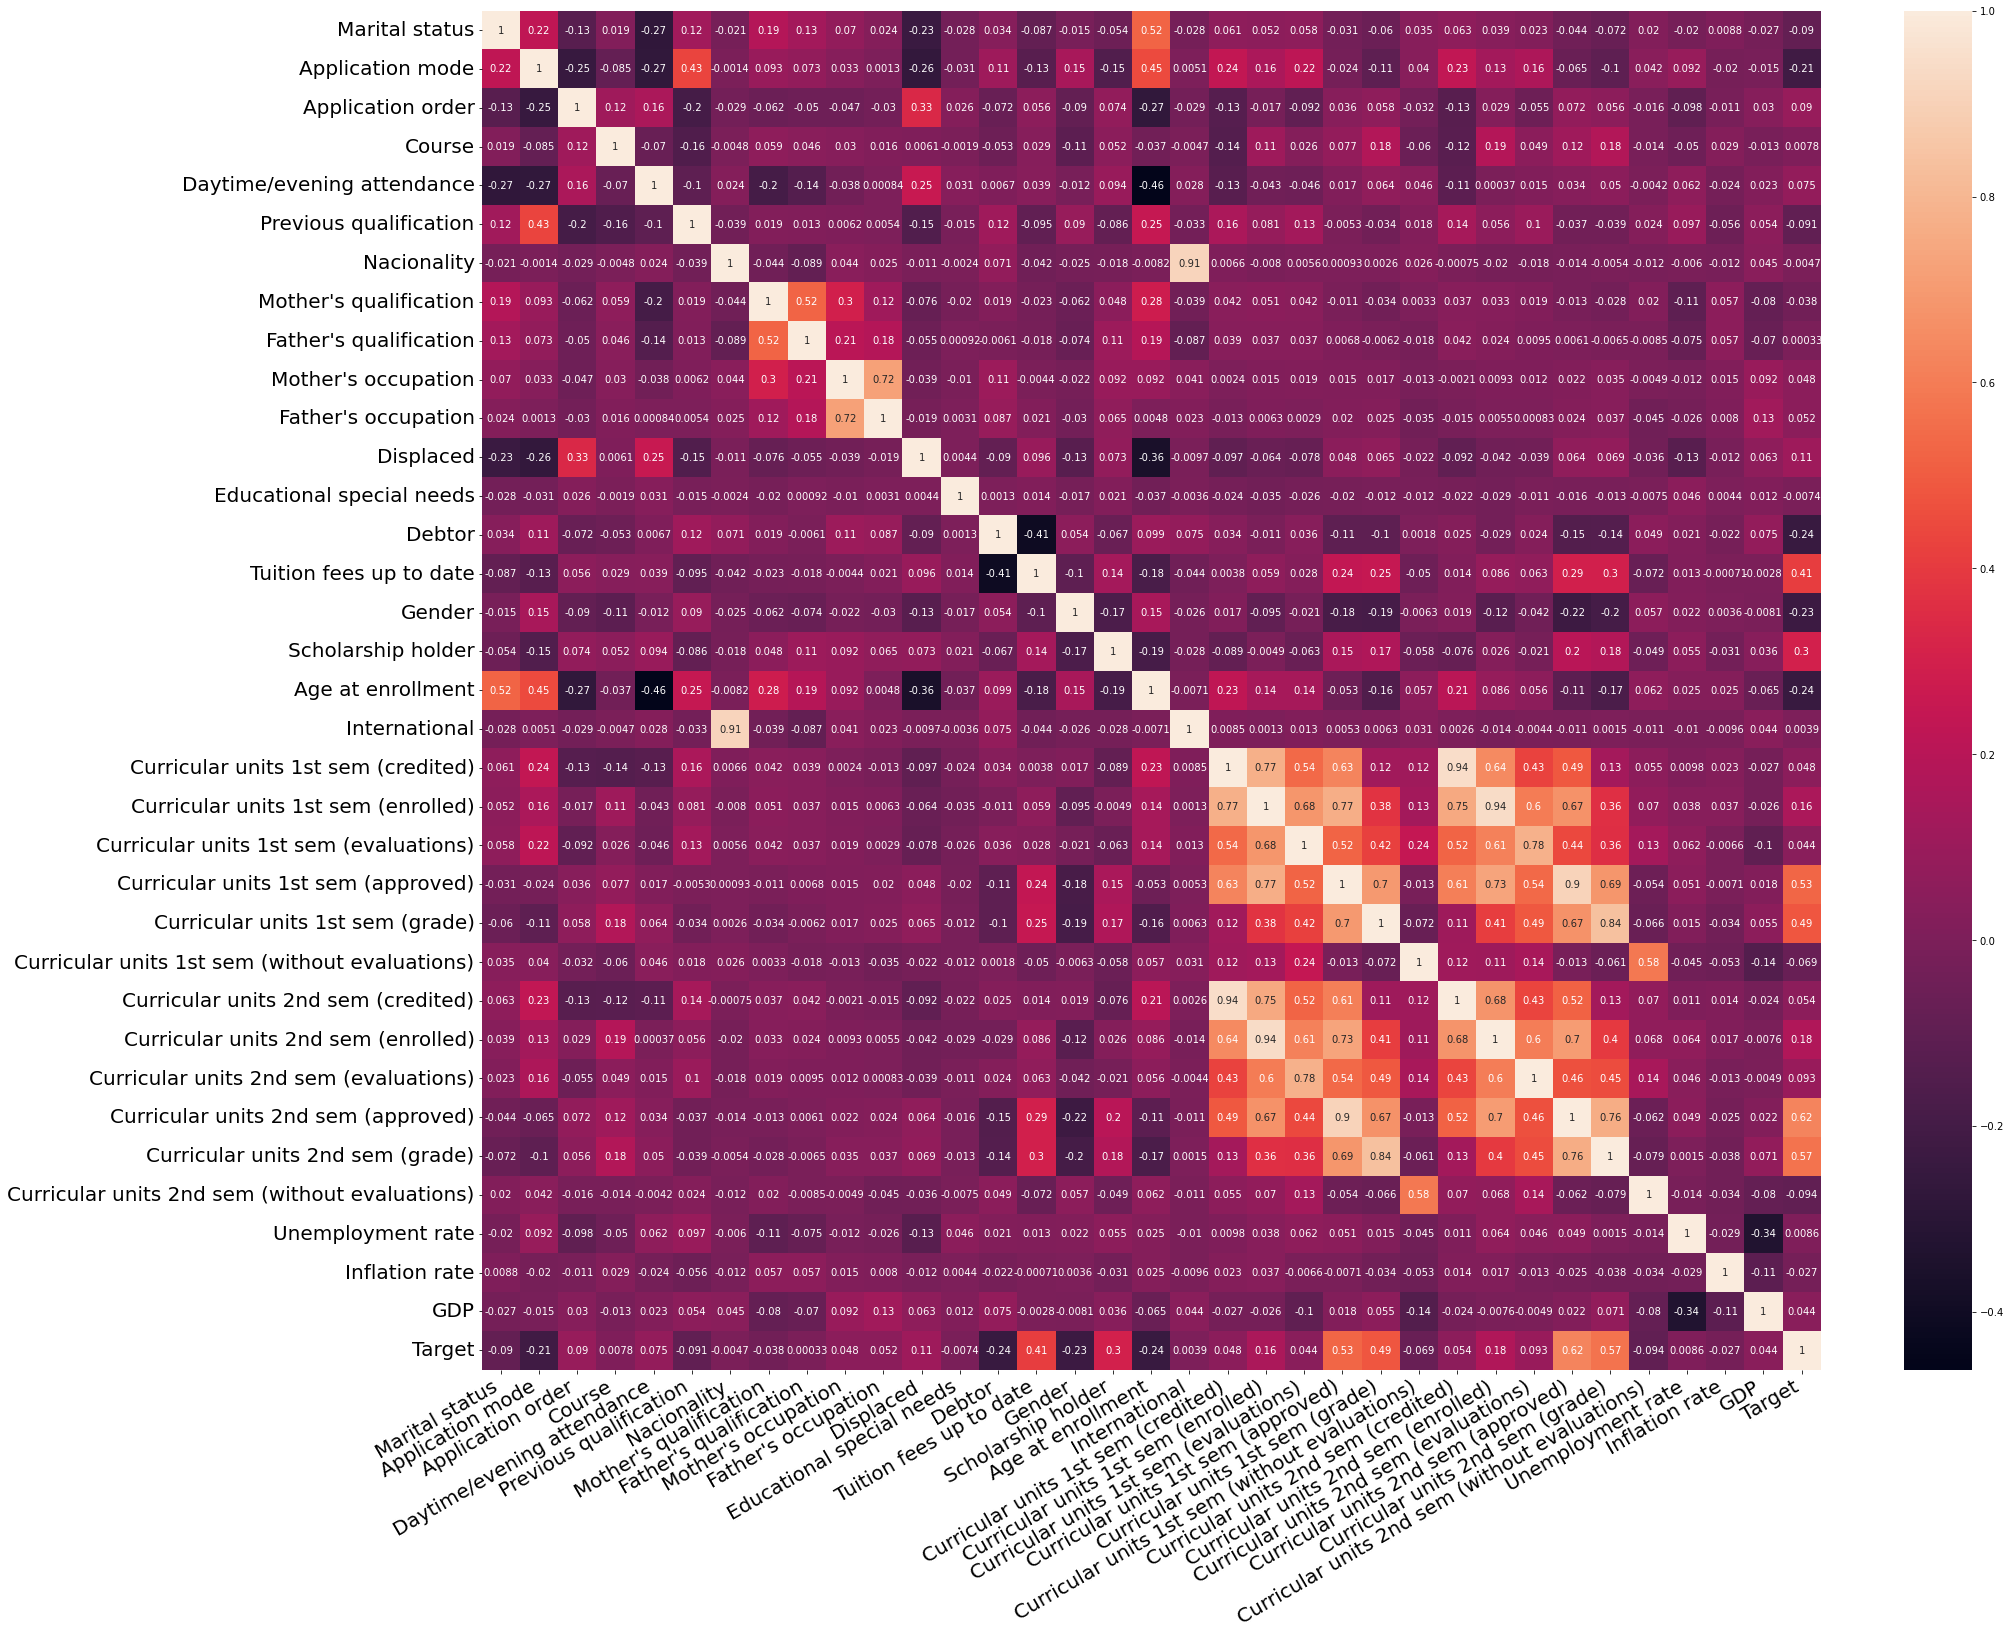

In [19]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = df.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [20]:
fig = px.scatter(df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [21]:
std_df = df.iloc[:,[1,11,13,14,15,16,17,20,22,23,26,28,29,34]]

In [22]:
std_df.head()

Application mode  Displaced  Debtor  Tuition fees up to date  Gender  \
0                 8          1       0                        1       1   
1                 6          1       0                        0       1   
2                 1          1       0                        0       1   
3                 8          1       0                        1       0   
4                12          0       0                        1       0   

   Scholarship holder  Age at enrollment  Curricular units 1st sem (enrolled)  \
0                   0                 20                                    0   
1                   0                 19                                    6   
2                   0                 19                                    6   
3                   0                 20                                    6   
4                   0                 45                                    6   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (approved)  \
0                                    0                                    0   
1                                    6                                    6   
2                                    6                                    0   
3                                    6                                    5   
4                                    6                                    6   

   Curricular units 2nd sem (grade)  Target  
0                          0.000000       0  
1                         13.666667       2  
2                          0.000000       0  
3                         12.400000       2  
4                         13.000000       2

In [23]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application mode                     4424 non-null   int64  
 1   Displaced                            4424 non-null   int64  
 2   Debtor                               4424 non-null   int64  
 3   Tuition fees up to date              4424 non-null   int64  
 4   Gender                               4424 non-null   int64  
 5   Scholarship holder                   4424 non-null   int64  
 6   Age at enrollment                    4424 non-null   int64  
 7   Curricular units 1st sem (enrolled)  4424 non-null   int64  
 8   Curricular units 1st sem (approved)  4424 non-null   int64  
 9   Curricular units 1st sem (grade)     4424 non-null   float64
 10  Curricular units 2nd sem (enrolled)  4424 non-null   int64  
 11  Curricular units 2nd sem (appr

In [24]:
corr_std = std_df.corr()['Target']

In [25]:
corr_std

Application mode                      -0.212025
Displaced                              0.113986
Debtor                                -0.240999
Tuition fees up to date                0.409827
Gender                                -0.229270
Scholarship holder                     0.297595
Age at enrollment                     -0.243438
Curricular units 1st sem (enrolled)    0.155974
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Target                                 1.000000
Name: Target, dtype: float64

In [26]:
corr_std.to_csv('correlation_updated.csv')

<AxesSubplot:>

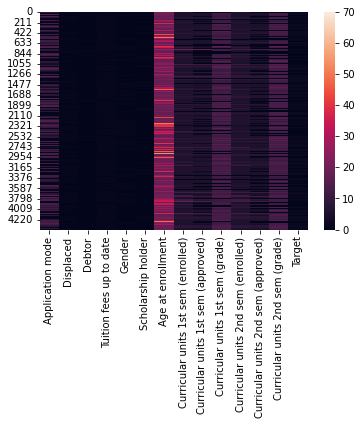

In [27]:
sns.heatmap(std_df)

In [28]:
std_df.shape

(4424, 14)

Text(0.5, 1.0, 'All the Possible Outcomes')

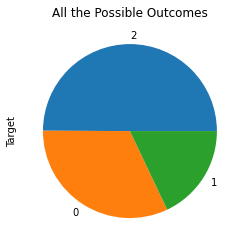

In [29]:
std_df['Target'].value_counts().plot(kind = 'pie')
plt.title('All the Possible Outcomes')

In [30]:
x = std_df['Target'].value_counts().index
y = std_df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='All the Possible Outcomes')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

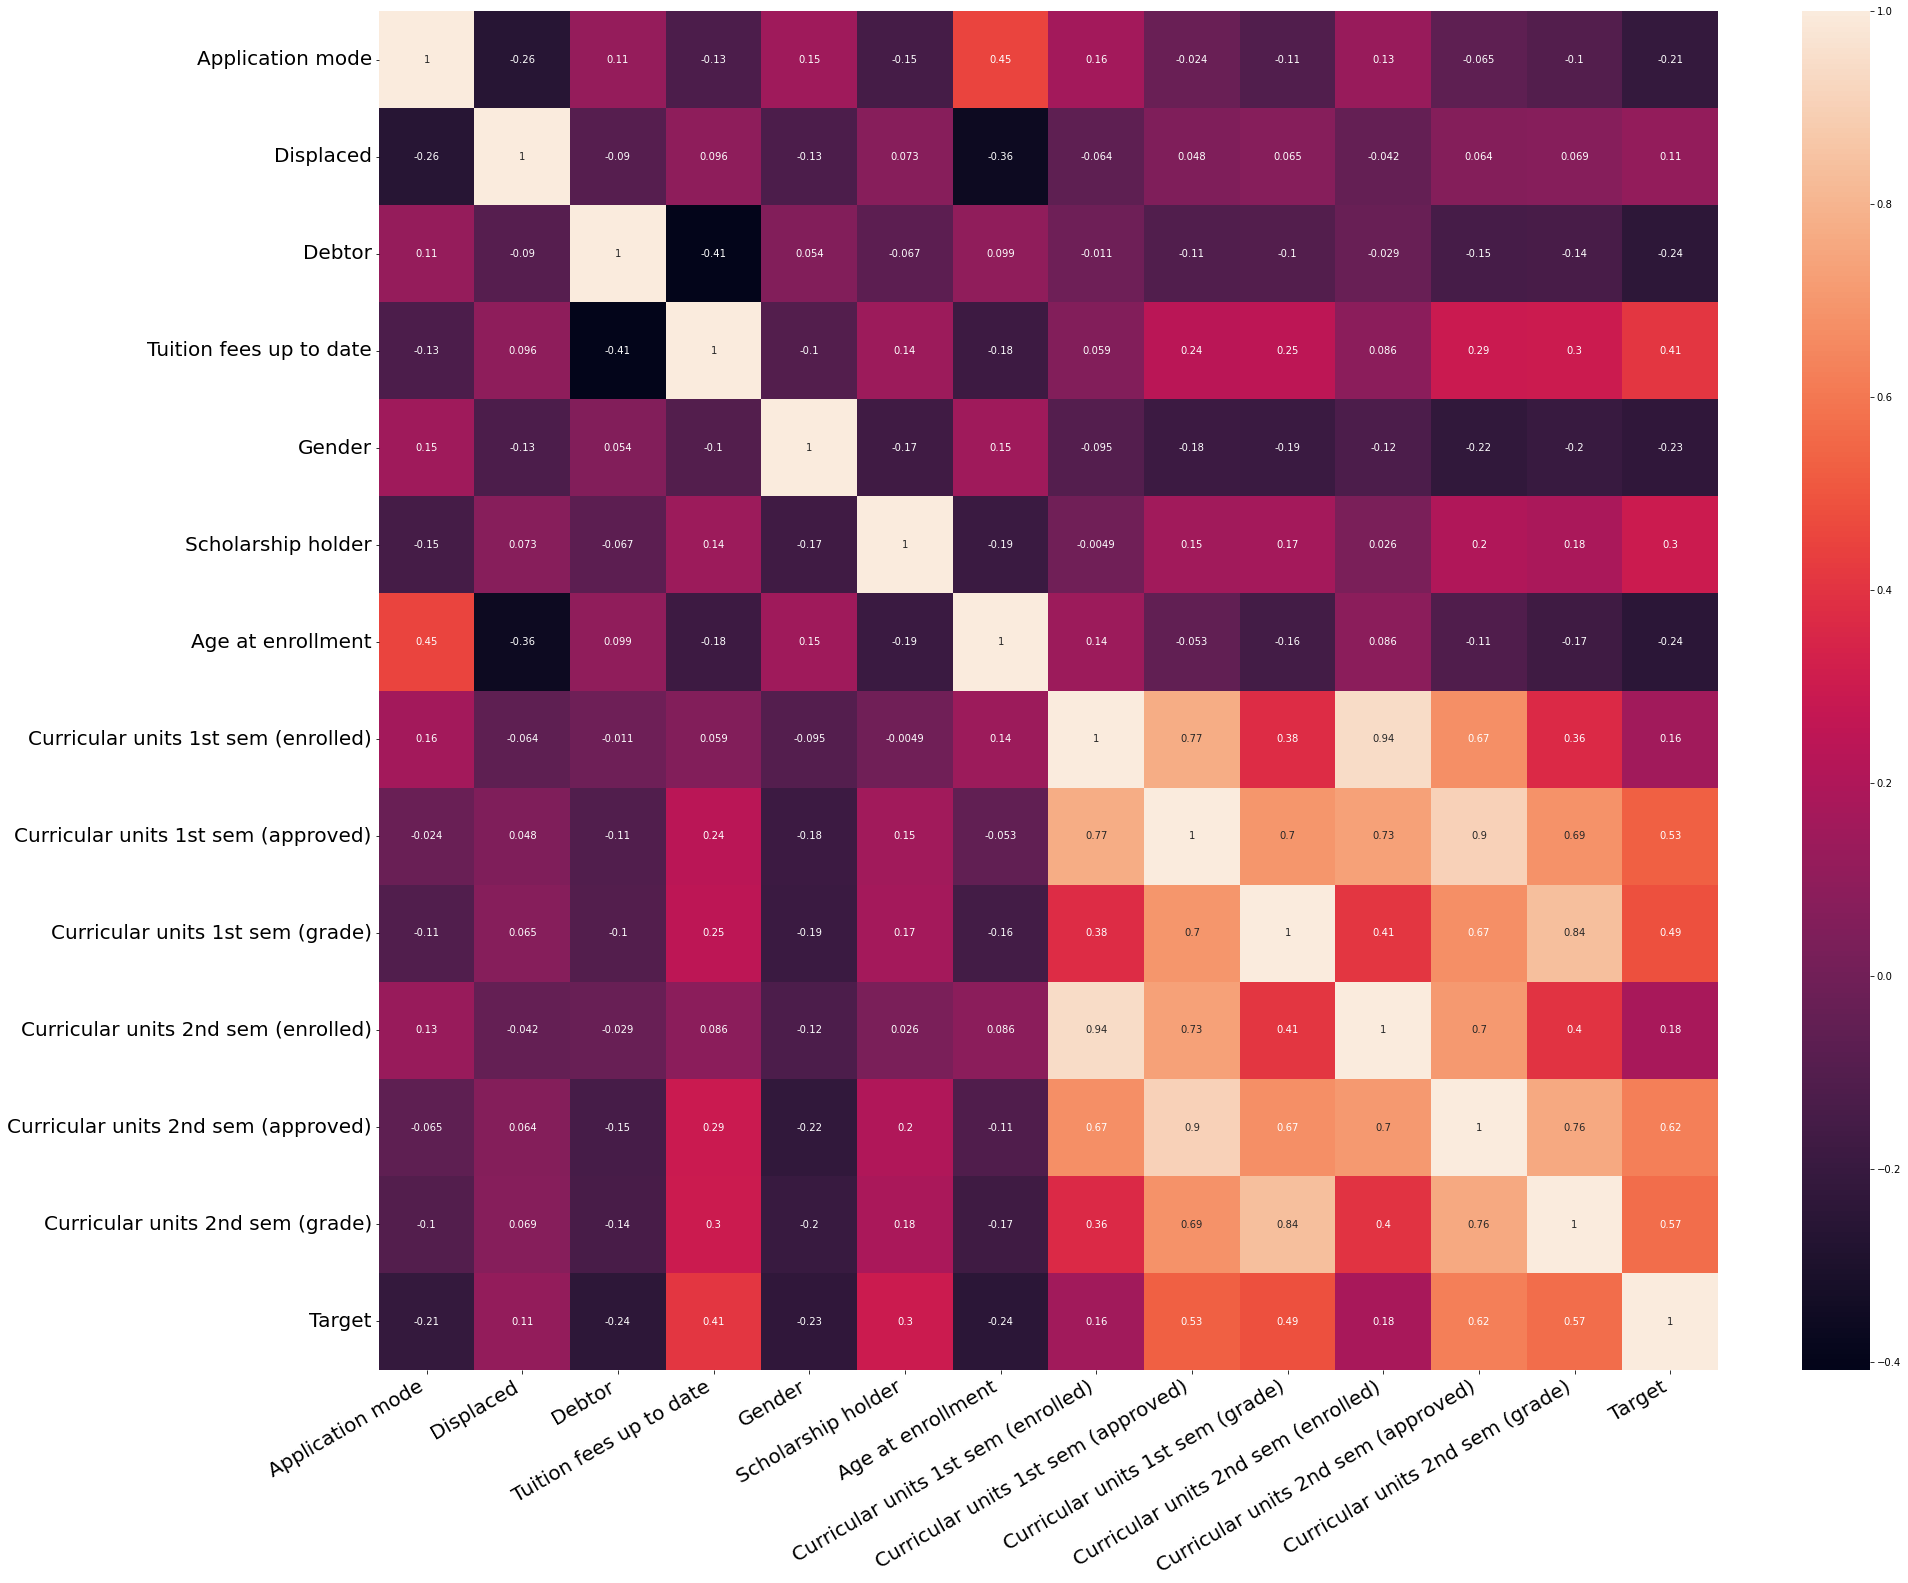

In [31]:
correlation_figure, correlation_axis = plt.subplots(figsize = (30,25))
corr_mtrx = std_df.corr()
correlation_axis = sns.heatmap(corr_mtrx, annot= True)

plt.xticks(rotation = 30, horizontalalignment = 'right', fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [32]:
fig = px.scatter(std_df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [33]:
fig = px.box(std_df, y='Age at enrollment')
fig.show()

Text(0, 0.5, 'Value Counts')

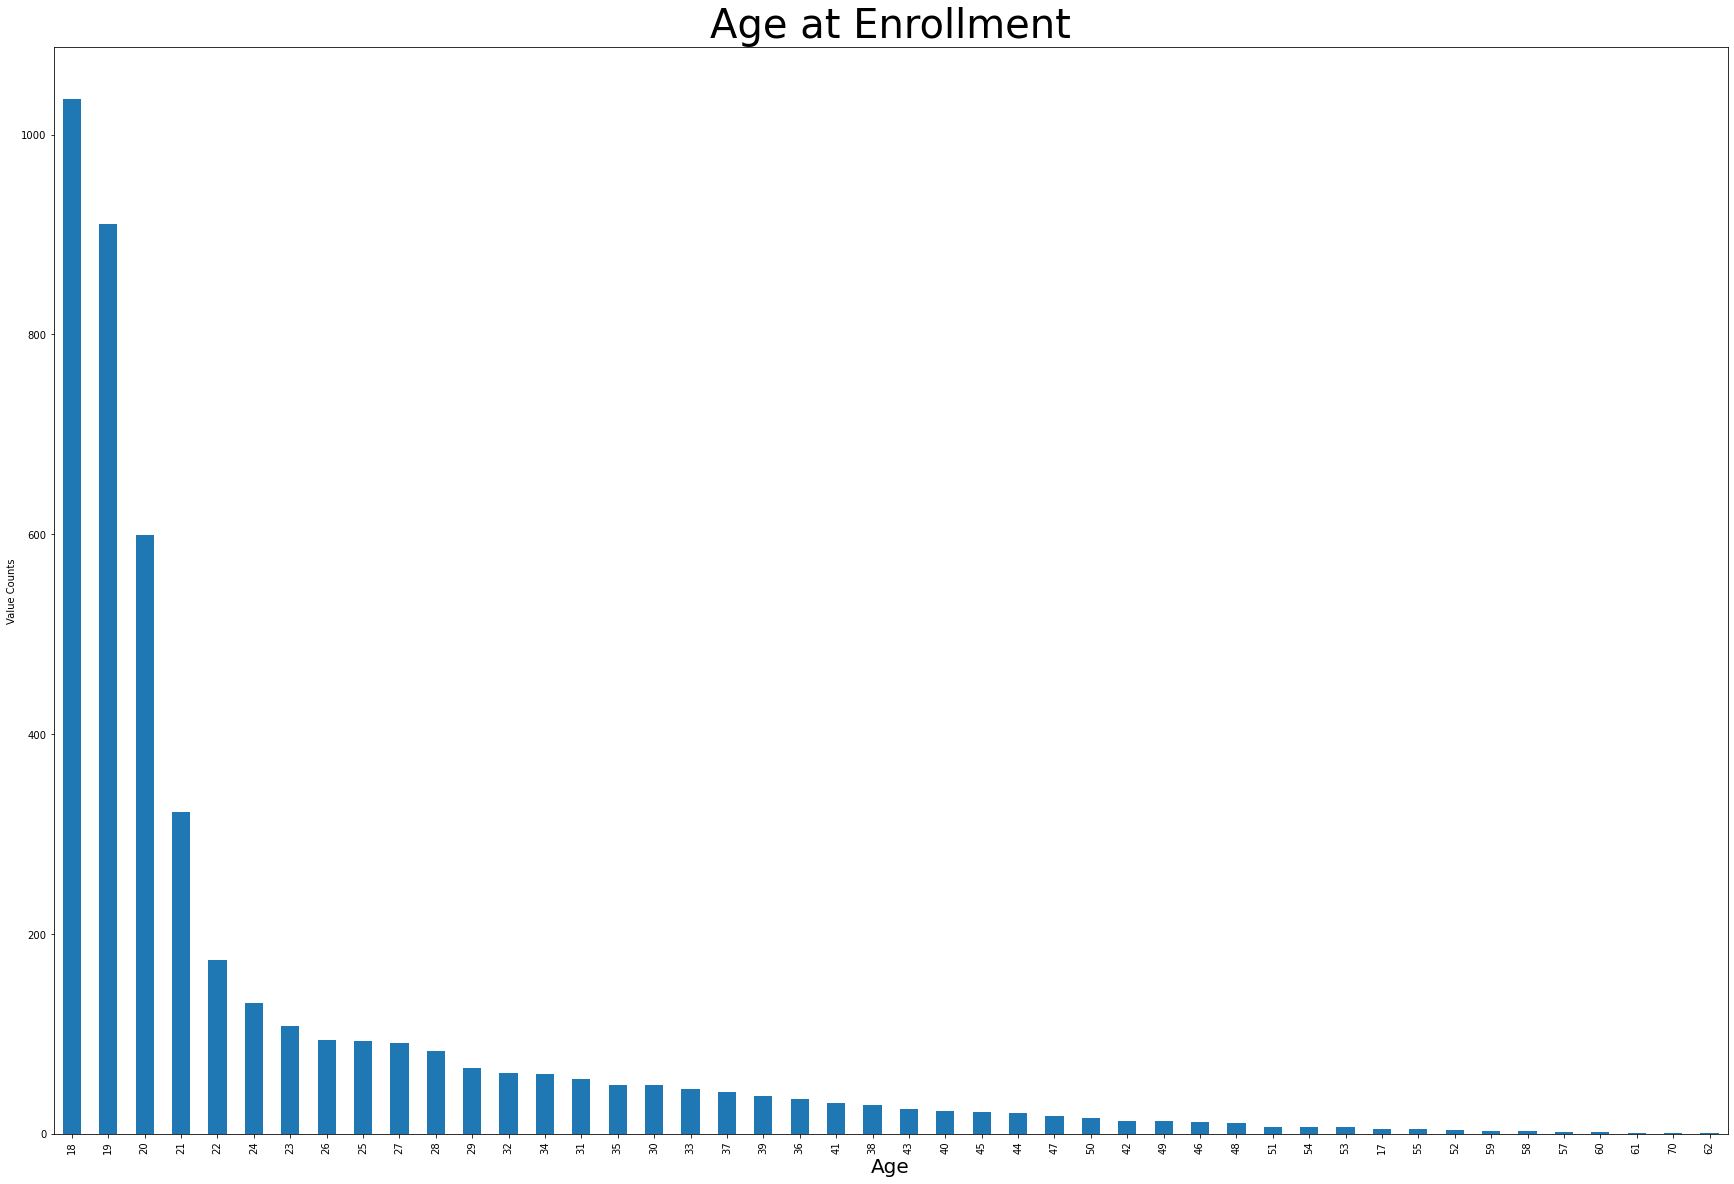

In [34]:
plt.figure(figsize=(30,20)) 

std_df['Age at enrollment'].value_counts().plot(kind = 'bar')
plt.title('Age at Enrollment', fontsize = 40)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Value Counts')

In [35]:
std_df.shape

(4424, 14)

In [36]:
std_df['Application mode'].unique()

array([ 8,  6,  1, 12,  9, 17, 15, 16, 14,  4, 13,  7,  3,  2,  5, 18, 10,
       11], dtype=int64)

In [37]:
X = std_df.iloc[:, 0:13]
y = std_df.iloc[:, -1]

In [38]:
X.head()

Application mode  Displaced  Debtor  Tuition fees up to date  Gender  \
0                 8          1       0                        1       1   
1                 6          1       0                        0       1   
2                 1          1       0                        0       1   
3                 8          1       0                        1       0   
4                12          0       0                        1       0   

   Scholarship holder  Age at enrollment  Curricular units 1st sem (enrolled)  \
0                   0                 20                                    0   
1                   0                 19                                    6   
2                   0                 19                                    6   
3                   0                 20                                    6   
4                   0                 45                                    6   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (approved)  \
0                                    0                                    0   
1                                    6                                    6   
2                                    6                                    0   
3                                    6                                    5   
4                                    6                                    6   

   Curricular units 2nd sem (grade)  
0                          0.000000  
1                         13.666667  
2                          0.000000  
3                         12.400000  
4                         13.000000

In [39]:
X.shape

(4424, 13)

In [40]:
y.head()

0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
X_train.shape

(3539, 13)

In [43]:
X_test.shape

(885, 13)

In [44]:
y_train.shape

(3539,)

In [45]:
y_test.shape

(885,)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier(random_state=0)
model_rfc = rfc.fit(X_train,y_train)
tr_pred_rfc = model_rfc.predict(X_train)
ts_pred_rfc = model_rfc.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rfc))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rfc))

training accuracy is: 0.9906753320146934
testing accuracy is: 0.7740112994350282


In [49]:
from sklearn.tree import plot_tree, export_text

In [50]:
plt.figure(figsize=(400,100))
plot_tree(dtc, feature_names=X_train.columns, max_depth=1, filled=True);

NameError: name 'dtc' is not defined

<Figure size 28800x7200 with 0 Axes>

In [51]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=7)
model_dtc = dtc.fit(X_train,y_train)
tr_pred_dtc = model_dtc.predict(X_train)
ts_pred_dtc = model_dtc.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_dtc))
print("testing accuracy is:",accuracy_score(ts_pred_dtc,y_test))

training accuracy is: 0.8013563153433173
testing accuracy is: 0.7378531073446327


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression(random_state=0)

In [54]:
lrm = lr.fit(X_train, y_train)

In [55]:
ts_pred_lr = lrm.predict(X_test)

In [56]:
print("testing accuracy is:",accuracy_score(ts_pred_lr, y_test))

testing accuracy is: 0.7694915254237288


In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
rf = RandomForestClassifier(bootstrap=False, max_depth=14,max_features=5,
                             min_samples_split=15,
                             n_estimators=50, random_state=0)
dtc = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression()

pipe = VotingClassifier([('rf', rf), ('dtc', dtc), ('lr', lr)],weights=[3,3,1])

In [59]:
pipe.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=14,
                                                     max_features=5,
                                                     min_samples_split=15,
                                                     n_estimators=50,
                                                     random_state=0)),
                             ('dtc', DecisionTreeClassifier(random_state=42)),
                             ('lr', LogisticRegression())],
                 weights=[3, 3, 1])

In [60]:
ts_pred_vc = lrm.predict(X_test)

In [61]:
print("Validation accuracy is:",accuracy_score(y_test,ts_pred_vc))

Validation accuracy is: 0.7694915254237288


In [62]:
clf = RandomForestClassifier(bootstrap=False, max_depth=10,max_features=13,
                             min_samples_split=12,
                             n_estimators=100, random_state=0)

model_clf = rfc.fit(X_train,y_train)
tr_pred_clf = model_rfc.predict(X_train)
ts_pred_clf = model_rfc.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_clf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_clf))
print("Precision Score: ", precision_score(y_test, ts_pred_clf,average='micro'))
print("Recall Score: ", recall_score(y_test, ts_pred_clf,average='micro'))
print("F1 Score: ", f1_score(y_test, ts_pred_clf,average='micro'))

training accuracy is: 0.9906753320146934
testing accuracy is: 0.7740112994350282
Precision Score:  0.7740112994350282
Recall Score:  0.7740112994350282
F1 Score:  0.7740112994350282


In [63]:
clf2 = RandomForestClassifier(bootstrap=False, max_depth= 10,max_features=13,
                             min_samples_split=12,
                             n_estimators=100, random_state=42)

model_clf2 = clf2.fit(X_train,y_train)
tr_pred_clf2 = model_clf2.predict(X_train)
ts_pred_clf2 = model_clf2.predict(X_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_clf2))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_clf2))
print("Precision Score: ", precision_score(y_test, ts_pred_clf2,average='micro'))
print("Recall Score: ", recall_score(y_test, ts_pred_clf2,average='micro'))
print("F1 Score: ", f1_score(y_test, ts_pred_clf2,average='micro'))

training accuracy is: 0.8338513704436281
testing accuracy is: 0.7265536723163842
Precision Score:  0.7265536723163842
Recall Score:  0.7265536723163842
F1 Score:  0.7265536723163842


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

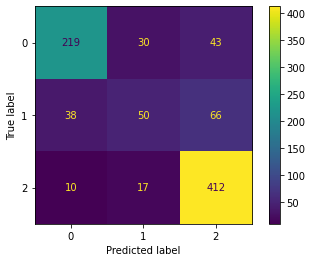

In [65]:
cm = confusion_matrix(y_test, ts_pred_vc)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

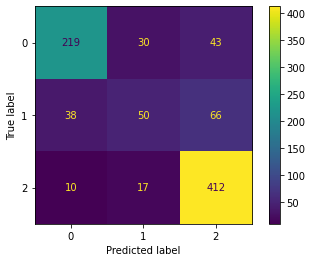

In [66]:
cm2 = confusion_matrix(y_test, ts_pred_clf2)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [68]:
!pip install xgboost

In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [74]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', 
                            random_state=42,
                            max_depth=13,
                            n_estimators=50,
                            min_child_weight=1,
                            )

In [75]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [76]:
xgb_train_pred = xgb_clf.predict(X_train)
xgb_test_pred = xgb_clf.predict(X_test)

In [77]:
train_acc = accuracy_score(y_train, xgb_train_pred)
test_acc = accuracy_score(y_test, xgb_test_pred)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 0.990392766318169
Testing accuracy: 0.7480225988700565


# GridSearchCV

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameters and the ranges to search over
param_grid = {
    'n_estimators': [30, 50, 70, 100, 120, 150, 200],
    'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26],
    'min_samples_split': [2, 5, 10, 12,  15, 17, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 50}
Best score:  0.7711253086567738


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 8, 10, 12, 14, 17],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 70, 100, 500, 1000],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
}

# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
lr = LogisticRegression()

# Define the hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Define the GridSearchCV object with 5-fold cross-validation
grid_lr = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_lr.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_lr.best_params_)
print("Best score: ", grid_lr.best_score_)

# Visualizations

In [194]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

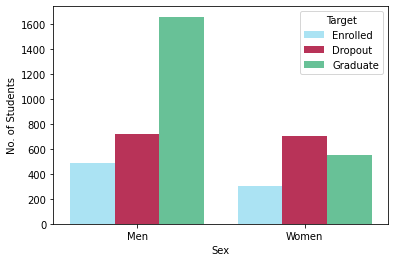

In [188]:
sns.countplot(data= df, x='Gender', hue='Target', hue_order=['Enrolled', 'Dropout', 'Graduate'], palette=["#9FEAFF", "#CE1D4E", "#59D098"])
plt.xticks(ticks=[0,1], labels=['Men','Women'])
plt.ylabel('No. of Students')
plt.xlabel('Sex')
plt.show()

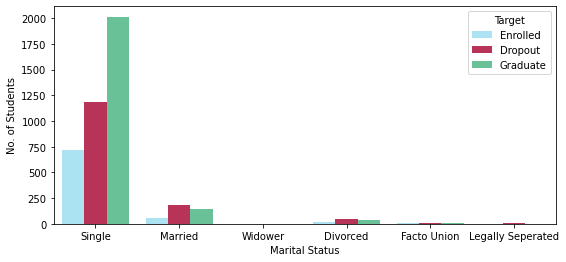

In [187]:
plt.figure(figsize=(9,4))

sns.countplot(data=df, x='Marital status', hue='Target', hue_order=['Enrolled', 'Dropout', 'Graduate'], palette=["#9FEAFF", "#CE1D4E", "#59D098"])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('No. of Students')
plt.show()

In [189]:
from seaborn import regplot

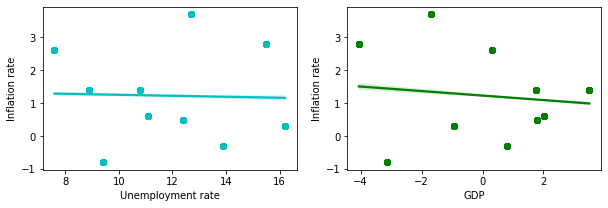

In [250]:
from seaborn import regplot  # import regplot function
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

# Plot the first regression line on the first subplot
regplot(data=df, y="Inflation rate", x="Unemployment rate", color="c", ax=ax1)
plt.ylabel('Inflatiion Rate')

# Plot the second regression line on the second subplot
regplot(data=df, y="Inflation rate", x="GDP", color="g", ax=ax2)

# Show the plot
plt.show()

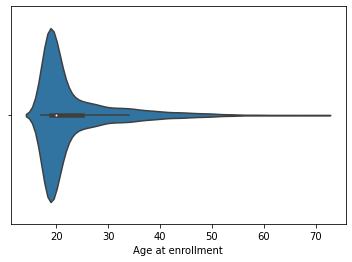

In [248]:
sns.violinplot(x=df["Age at enrollment"], orient='v')

plt.show()